In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
import pickle as pkl

In [4]:
from datetime import timedelta

In [5]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.metrics import roc_curve, auc

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn import pipeline, preprocessing

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.metrics import precision_recall_curve

In [15]:
from sklearn.metrics import average_precision_score

In [16]:
from sklearn.metrics import recall_score

In [17]:
df=pd.read_csv('./data/start-up_mod_w_sa.csv',index_col=0 )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3639 entries, 0 to 3638
Data columns (total 18 columns):
index                       3639 non-null int64
company_name                3639 non-null object
status                      3639 non-null object
category_code               3639 non-null object
CA                          3639 non-null int64
NY                          3639 non-null int64
MA                          3639 non-null int64
TX                          3639 non-null int64
WA                          3639 non-null int64
founded_month               3639 non-null int64
first_funding_dayinop       3639 non-null float64
ave_inf_y                   3639 non-null float64
ag_funded_daysop            3639 non-null float64
ag_raised_amount_usd_adj    3639 non-null float64
cr_funded_daysop            3639 non-null float64
cr_raised_amount_usd_adj    3639 non-null float64
sa_funded_daysop            3639 non-null float64
sa_raised_amount_usd_adj    3639 non-null float64
dtypes: fl

In [19]:
df

,index,company_name,status,category_code,CA,NY,MA,TX,WA,founded_month,first_funding_dayinop,ave_inf_y,ag_funded_daysop,ag_raised_amount_usd_adj,cr_funded_daysop,cr_raised_amount_usd_adj,sa_funded_daysop,sa_raised_amount_usd_adj
0,0,1-800-DENTIST,operating,health,1,0,0,0,0,1,8996.0,10.070707,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10-20 Media,operating,ecommerce,0,0,0,0,0,1,3375.0,16.888889,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1010data,operating,software,0,1,0,0,0,1,3719.0,16.393939,0.0,0.0,0.0,0.0,0.0,0.0
3,3,170 Systems,acquired,software,0,0,1,0,0,1,4488.0,12.202020,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1stdibs,operating,ecommerce,0,1,0,0,0,1,3958.0,16.888889,4291.0,0.0,0.0,0.0,0.0,0.0
5,5,22nd Century Group,ipo,biotech,0,1,0,0,0,1,5109.0,15.464646,5515.0,43680.0,0.0,0.0,0.0,0.0
6,6,"2nd Story Software, Inc.",acquired,software,0,0,0,0,0,2,2600.0,15.464646,0.0,0.0,0.0,0.0,0.0,0.0
7,7,37signals,operating,public_relations,0,0,0,0,0,1,2738.0,15.828283,0.0,0.0,0.0,0.0,2738.0,0.0
8,8,3D Systems,ipo,software,0,0,0,0,0,1,8778.0,10.070707,0.0,0.0,0.0,0.0,0.0,0.0
9,9,3dCart Shopping Cart Software,operating,ecommerce,0,0,0,0,0,5,4628.0,15.212121,4628.0,800000.0,0.0,0.0,0.0,0.0


In [20]:
df.columns

Index(['index', 'company_name', 'status', 'category_code', 'CA', 'NY', 'MA',
       'TX', 'WA', 'founded_month', 'first_funding_dayinop', 'ave_inf_y',
       'ag_funded_daysop', 'ag_raised_amount_usd_adj', 'cr_funded_daysop',
       'cr_raised_amount_usd_adj', 'sa_funded_daysop',
       'sa_raised_amount_usd_adj'],
      dtype='object')

In [21]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + cr_funded_daysop + cr_raised_amount_usd_adj''',data=df,return_type='dataframe')

In [22]:
X1=X1.drop(columns='Intercept')


In [23]:
X1

,category_code[T.analytics],category_code[T.automotive],category_code[T.biotech],category_code[T.cleantech],category_code[T.consulting],category_code[T.design],category_code[T.ecommerce],category_code[T.education],category_code[T.enterprise],category_code[T.fashion],...,MA,TX,WA,founded_month,first_funding_dayinop,ave_inf_y,ag_funded_daysop,ag_raised_amount_usd_adj,cr_funded_daysop,cr_raised_amount_usd_adj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8996.0,10.070707,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3375.0,16.888889,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3719.0,16.393939,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,4488.0,12.202020,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3958.0,16.888889,4291.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5109.0,15.464646,5515.0,43680.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2600.0,15.464646,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2738.0,15.828283,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8778.0,10.070707,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,4628.0,15.212121,4628.0,800000.0,0.0,0.0


In [24]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3639 entries, 0 to 3638
Data columns (total 53 columns):
category_code[T.analytics]           3639 non-null float64
category_code[T.automotive]          3639 non-null float64
category_code[T.biotech]             3639 non-null float64
category_code[T.cleantech]           3639 non-null float64
category_code[T.consulting]          3639 non-null float64
category_code[T.design]              3639 non-null float64
category_code[T.ecommerce]           3639 non-null float64
category_code[T.education]           3639 non-null float64
category_code[T.enterprise]          3639 non-null float64
category_code[T.fashion]             3639 non-null float64
category_code[T.finance]             3639 non-null float64
category_code[T.games_video]         3639 non-null float64
category_code[T.government]          3639 non-null float64
category_code[T.hardware]            3639 non-null float64
category_code[T.health]              3639 non-null float64
category

In [25]:
y1['status[acquired]'].sum()/len(y1)

0.16597966474306128

In [26]:
y1_ac=y1['status[acquired]']

In [27]:
##logistc regression and auc estimates

X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ac = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
    
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)

y_score1=log_ac.predict_proba(X1_train)[:,1]

fpr1_ac_train, tpr1_ac_train,_ = roc_curve(y1_ac_train, y_score1)
roc_auc1_ac_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac,roc_auc1_ac_train)

0.7063961436074538 0.7240456312804027


In [28]:
y1['status[ipo]'].sum()/len(y1)

0.0494641384995878

In [29]:
y1_ipo=y1['status[ipo]']

In [30]:
## logistic regression or ipo category
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)


tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ipo = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

y_score=log_ipo.predict_proba(X1_train)[:,1]

fpr1_ipo_train, tpr1_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_train = auc(fpr1_ipo_train, tpr1_ipo_train)

print(roc_auc1_ipo,roc_auc1_ipo_train)

0.6270813363155465 0.7034022132942996


In [31]:
## logistic regression with normallized variables and calculating AUC

# log_ac_p=pipeline.Pipeline([
#     ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
#     ( 'log', LogisticRegression())
# ])

norm=preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

X1_train_n=norm.fit_transform(X1_train)

X1_test_n = norm.transform(X1_test)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }


log_ac_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ac_n.fit(X1_train_n,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac, tpr1_ac)

y_score=log_ac_n.predict_proba(X1_train_n)[:,1]

fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc1_ac_n_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac, roc_auc1_ac_n_train )

0.7063961436074538 0.7240456312804027


In [32]:
## logistic regression with normallized variables and calculating AUC

log_ipo_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo_n.fit(X1_train_n,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)

y_score=log_ipo_n.predict_proba(X1_train_n)[:,1]

fpr1_ipo_n_train, tpr1_ipo_n_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_n_train = auc(fpr1_ipo_n_train, tpr1_ipo_n_train)

print(roc_auc1_ipo_n, roc_auc1_ipo_n_train)

0.6283594276990805 0.735659524328589


In [33]:
# random forest model for AC
tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}

randomforest_ac =  GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


y_score=randomforest_ac.predict_proba(X1_train)[:,1]

fpr2_ac_train, tpr2_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc2_ac_train = auc(fpr2_ac_train, tpr2_ac_train)


In [34]:
print(roc_auc2_ac, roc_auc2_ac_train)

0.6808115691776386 0.752914864250728


In [35]:
# random forest model for IPO

tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}
randomforest_ipo = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    

roc_auc2_ipo, roc_auc2_ipo_train 

(0.6772641743884689, 0.8447164346444922)

In [36]:
# Gradient Boosting Classifier on ipo
learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ipo=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

y_score_train=GBC_ipo.predict_proba(X1_train)[:,1]
fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)

 

In [37]:
roc_auc3_ipo, roc_auc3_ipo_train 

(0.6579330422125181, 0.8398917229852481)

In [38]:
# Gradient Boosting Classifier on AC

learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ac=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

y_score_train=GBC_ac.predict_proba(X1_train)[:,1]
fpr3_ac_train, tpr3_ac_train,_ = roc_curve(y1_ac_train, y_score_train)
roc_auc3_ac_train = auc(fpr3_ac_train, tpr3_ac_train)

roc_auc3_ac, roc_auc3_ac_train 

(0.707935822721059, 0.7877543720859774)

In [39]:
#Support vector machine on IPO

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]


SVC1_ipo=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ipo.fit(X1_train_n,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test_n)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)

y_score=SVC1_ipo.predict_proba(X1_train_n)[:,1]
fpr4_ipo_train, tpr4_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc4_ipo_train = auc(fpr4_ipo_train, tpr4_ipo_train)

roc_auc4_ipo, roc_auc4_ipo_train

(0.5781233358185109, 0.7892543108370447)

In [40]:
#Support vector machine on ac

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]

SVC1_ac=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ac.fit(X1_train_n,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test_n)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

y_score=SVC1_ac.predict_proba(X1_train_n)[:,1]
fpr4_ac_train, tpr4_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc4_ac_train = auc(fpr4_ac_train, tpr4_ac_train)

roc_auc4_ac, roc_auc4_ac_train

(0.6295992517447297, 0.7893635017084378)

In [41]:
#Naive-Bayes on IPO, it does not have hyperparameters 
bayes_ipo = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ipo.fit(X1_train,y1_ipo_train)

y_score=bayes_ipo.predict_proba(X1_test)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

y_score=bayes_ipo.predict_proba(X1_train)[:,1]
fpr6_ipo_train, tpr6_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc6_ipo_train = auc(fpr6_ipo_train, tpr6_ipo_train)

roc_auc6_ipo, roc_auc6_ipo_train

(0.6415663719955977, 0.6978858471664227)

In [42]:
#Naive-Bayes on ac, it does not have hyperparameters 
bayes_ac = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ac.fit(X1_train,y1_ac_train)

y_score=bayes_ac.predict_proba(X1_test)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

y_score=bayes_ac.predict_proba(X1_train)[:,1]
fpr6_ac_train, tpr6_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc6_ac_train = auc(fpr6_ac_train, tpr6_ac_train)

In [43]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)

    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [44]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [45]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [46]:
np.mean(info_b_ipo['Train auc'])

0.6961634168289798

In [47]:
np.mean(info_b_ipo['Test auc'])

0.6290487840864099

In [48]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [49]:
info_b_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.600619,0.620155,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,3532 0.0 1563 0.0 18 1.0 1607 0....,524 0.0 1341 0.0 2341 0.0 3092 1....
1,0.651888,0.609951,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2441 0.0 3632 0.0 3611 0.0 3456 1....,694 0.0 384 0.0 2943 0.0 1511 0....
2,0.606223,0.611001,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2230 0.0 787 0.0 924 0.0 3031 0....,3433 0.0 1340 0.0 1008 0.0 716 0....
3,0.608450,0.626855,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1077 1.0 3491 1.0 121 0.0 3016 0....,3581 1.0 147 0.0 3492 0.0 3405 0....
4,0.643137,0.612712,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1533 1.0 2287 0.0 2441 0.0 1524 1....,303 0.0 815 0.0 1343 0.0 1118 0....
5,0.641154,0.617251,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2027 0.0 571 0.0 2824 0.0 2968 1....,2727 0.0 870 0.0 658 0.0 1813 1....
6,0.588062,0.607779,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1322 0.0 1454 0.0 1431 0.0 464 1....,3313 0.0 1933 0.0 1921 0.0 736 0....
7,0.598808,0.619721,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,634 0.0 1775 0.0 2585 0.0 3086 1....,1521 0.0 3581 1.0 538 0.0 2533 0....
8,0.596902,0.615917,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1585 0.0 593 0.0 3323 0.0 2549 0....,2214 0.0 774 1.0 3571 0.0 1425 1....
9,0.650880,0.628902,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1705 0.0 1063 0.0 3523 1.0 621 1....,1158 0.0 1392 0.0 2713 0.0 3198 0....


In [50]:
np.mean(info_b_ac['Train auc'])

0.6170243433062756

In [51]:
np.mean(info_b_ac['Test auc'])

0.6186121378190351

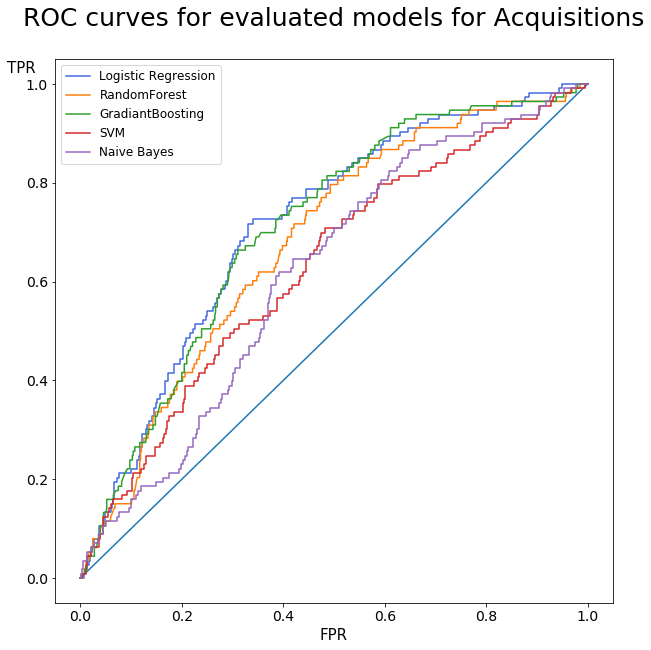

In [52]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='Logistic Regression', color='royalblue')
#plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr2_ac,tpr2_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM')
plt.plot(fpr6_ac,tpr6_ac,label='Naive Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


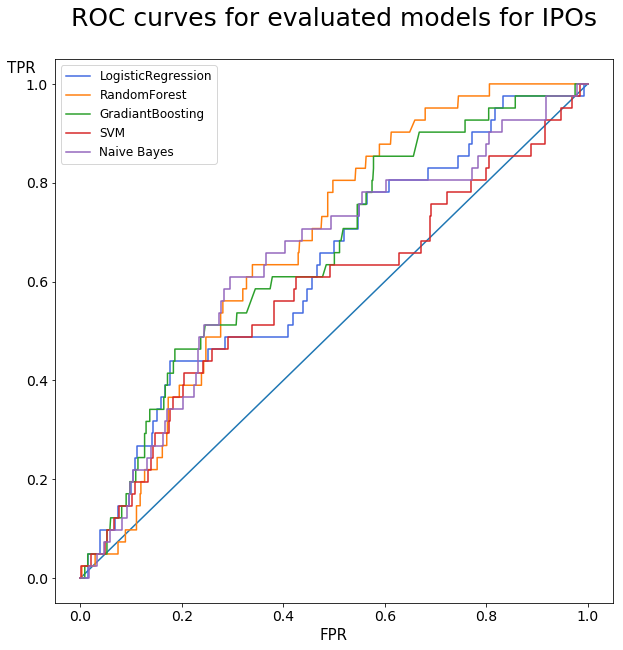

In [53]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='LogisticRegression', color='royalblue')
# plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr2_ipo,tpr2_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM')
plt.plot(fpr6_ipo,tpr6_ipo,label='Naive Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [54]:
Name=['logr', 'logr_n','RandomForest', 'GradiantBoosting','SVM','N Bayes']

In [55]:
Model_ac=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]

In [56]:
Model_ipo=[log_ipo,log_ipo_n,randomforest_ipo,GBC_ipo,SVC1_ipo,bayes_ipo]

In [57]:
auc_test_ac=[roc_auc1_ac,roc_auc1_ac_n, roc_auc2_ac,roc_auc3_ac,roc_auc4_ac, roc_auc6_ac]

In [58]:
auc_train_ac=[roc_auc1_ac_train, roc_auc1_ac_n_train, roc_auc2_ac_train,roc_auc3_ac_train,roc_auc4_ac_train, roc_auc6_ac_train]

In [59]:
auc_test_ipo=[roc_auc1_ipo,roc_auc1_ipo_n, roc_auc2_ipo,roc_auc3_ipo,roc_auc4_ipo, roc_auc6_ipo]

In [60]:
auc_train_ipo=[roc_auc1_ipo_train,roc_auc1_ipo_n_train, roc_auc2_ipo_train,roc_auc3_ipo_train,roc_auc4_ipo_train, roc_auc6_ipo_train]

In [61]:
fpr_ipo =[fpr1_ipo,fpr1_ipo_n,fpr2_ipo,fpr3_ipo,fpr4_ipo,fpr6_ipo]

In [62]:
fpr_ac =[fpr1_ac,fpr1_ac_n,fpr2_ac,fpr3_ac,fpr4_ac,fpr6_ac]

In [63]:
tpr_ac =[tpr1_ac,tpr1_ac_n,tpr2_ac,tpr3_ac,tpr4_ac,tpr6_ac]

In [64]:
tpr_ipo =[tpr1_ipo,tpr1_ipo_n,tpr2_ipo,tpr3_ipo,tpr4_ipo,tpr6_ipo]

In [65]:
fpr_ipo_train =[fpr1_ipo_train,fpr1_ipo_n_train,fpr2_ipo_train,fpr3_ipo_train,fpr4_ipo_train,fpr6_ipo_train]

In [66]:
fpr_ac_train =[fpr1_ac_train,fpr1_ac_n_train,fpr2_ac_train,fpr3_ac_train,fpr4_ac_train,fpr6_ac_train]

In [67]:
tpr_ipo_train =[tpr1_ipo_train,tpr1_ipo_n_train,tpr2_ipo_train,tpr3_ipo_train,tpr4_ipo_train,tpr6_ipo_train]

In [68]:
tpr_ac_train =[tpr1_ac_train,tpr1_ac_n_train,tpr2_ac_train,tpr3_ac_train,tpr4_ac_train,tpr6_ac_train]

In [69]:
Model_data_ac=pd.DataFrame({'name':Name, 'model':Model_ac,'auc_test_ac':auc_test_ac,
                            'auc_train_ac':auc_train_ac })

In [70]:
Model_data_ipo=pd.DataFrame({'name':Name, 'model':Model_ipo,'auc_test_ipo':auc_test_ipo,
                            'auc_train_ipo':auc_train_ipo})

In [71]:
Model_data_ac

,name,model,auc_test_ac,auc_train_ac
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.706396,0.724046
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.706396,0.724046
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.680812,0.752915
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.707936,0.787754
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.629599,0.789364
5,N Bayes,GaussianNB(priors=None),0.617699,0.615614


In [72]:
Model_data_ipo

,name,model,auc_test_ipo,auc_train_ipo
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.627081,0.703402
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.628359,0.735660
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.677264,0.844716
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.657933,0.839892
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.578123,0.789254
5,N Bayes,GaussianNB(priors=None),0.641566,0.697886


In [73]:
Model_data_ac[['name','auc_test_ac','auc_train_ac']]

,name,auc_test_ac,auc_train_ac
0,logr,0.706396,0.724046
1,logr_n,0.706396,0.724046
2,RandomForest,0.680812,0.752915
3,GradiantBoosting,0.707936,0.787754
4,SVM,0.629599,0.789364
5,N Bayes,0.617699,0.615614


In [74]:
log_ac_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00411153, 0.00614794, 0.00416613, 0.0093948 , 0.01506988,
        0.01715899, 0.02918069, 0.02320019, 0.0322597 , 0.03798485,
        0.05801233, 0.04718065, 0.57273976, 0.0529143 ]),
 'std_fit_time': array([7.96973864e-04, 3.67363206e-04, 1.26065651e-04, 6.77826448e-04,
        1.81512769e-03, 1.24708608e-03, 4.05543587e-03, 9.16260298e-04,
        2.17055618e-03, 3.35660189e-03, 1.66960957e-02, 3.52110663e-03,
        6.71658761e-01, 1.53549296e-03]),
 'mean_score_time': array([0.00089169, 0.00103712, 0.00092928, 0.0011162 , 0.00134635,
        0.00111508, 0.00103442, 0.00102719, 0.001237  , 0.00123032,
        0.00107137, 0.00127188, 0.00133332, 0.00117429]),
 'std_score_time': array([4.35234188e-05, 9.93890011e-05, 6.83892472e-05, 5.59142260e-05,
        2.68944893e-04, 3.50904850e-05, 7.27767479e-05, 4.27535918e-05,
        1.95794386e-04, 2.23904737e-04, 3.11349065e-05, 1.55020282e-04,
        3.13589129e-04, 1.42396027e-04]),
 'param_C': masked_array(d

In [75]:
GBC_ac.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.22007751, 0.23320595, 0.23645695, 0.26962956, 0.21338248,
        0.21896434, 0.23502596, 0.24982166, 0.20260938, 0.23876794,
        0.25717974, 0.28375681, 0.20872911, 0.25722885, 0.25977286,
        0.2621882 , 0.21455161, 0.22593315, 0.25164938, 0.25458264,
        0.20330095, 0.22945865, 0.25642308, 0.25984701, 0.20844992,
        0.23062762, 0.24775863, 0.26362634, 0.21516856, 0.2357467 ,
        0.24683595, 0.25528955, 0.21531725, 0.23309143, 0.23928491,
        0.26174871, 0.21893271, 0.22705833, 0.23964159, 0.26155949,
        0.21379701, 0.23701278, 0.2492698 , 0.26137463, 0.22892332,
        0.2330366 , 0.24508429, 0.26280975, 0.22640657, 0.23064192,
        0.24172219, 0.27358214, 0.21553079, 0.24366196, 0.25994921,
        0.26313988, 0.21995258, 0.25799735, 0.28196804, 0.27484934,
        0.22944999, 0.25382559, 0.25443101, 0.27299301, 0.22390397,
        0.24175612, 0.25023079, 0.28035665, 0.22734094, 0.23267023,
        0.25135398, 0.26595068,

In [76]:
log_ipo_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.0041697 , 0.00642308, 0.00472387, 0.00952562, 0.01139514,
        0.01452605, 0.0205787 , 0.02250902, 0.03799534, 0.03474569,
        0.07598813, 0.03948832, 0.32297397, 0.04703863]),
 'std_fit_time': array([1.15806348e-03, 1.27814053e-04, 6.89574797e-04, 8.27524874e-04,
        3.33380422e-03, 1.04454178e-03, 3.02980619e-03, 1.43084035e-03,
        3.54185022e-03, 4.50624905e-03, 2.13395962e-02, 4.51313975e-03,
        1.77199118e-01, 4.41596453e-03]),
 'mean_score_time': array([0.00109363, 0.00110785, 0.00109847, 0.00102464, 0.00103625,
        0.00136964, 0.00097164, 0.00167457, 0.00138275, 0.00106049,
        0.00131488, 0.00107567, 0.00120203, 0.0011944 ]),
 'std_score_time': array([1.67940914e-04, 2.32497467e-04, 2.73870785e-04, 6.64397860e-05,
        1.03529926e-04, 1.78465433e-04, 6.52429101e-05, 4.46053672e-04,
        1.55485273e-04, 2.49509343e-05, 1.99497236e-04, 4.53911797e-05,
        8.14131860e-05, 1.17651671e-04]),
 'param_C': masked_array(d

In [77]:
recall_score_ac_n=[]
precision_score_ac_n=[]
f1_score_ac=[]
for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ac_n.append(metrics.precision_score(y1_ac_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ac_n.append(metrics.recall_score(y1_ac_test, y_score))
    f1_score_ac.append(metrics.f1_score(y1_ac_test, y_score))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [78]:
ind=np.argmax(f1_score_ac)
list(np.linspace(0,1,100))[ind]

0.20202020202020204

In [79]:
f1_score_ac[ind]


0.40399002493765584

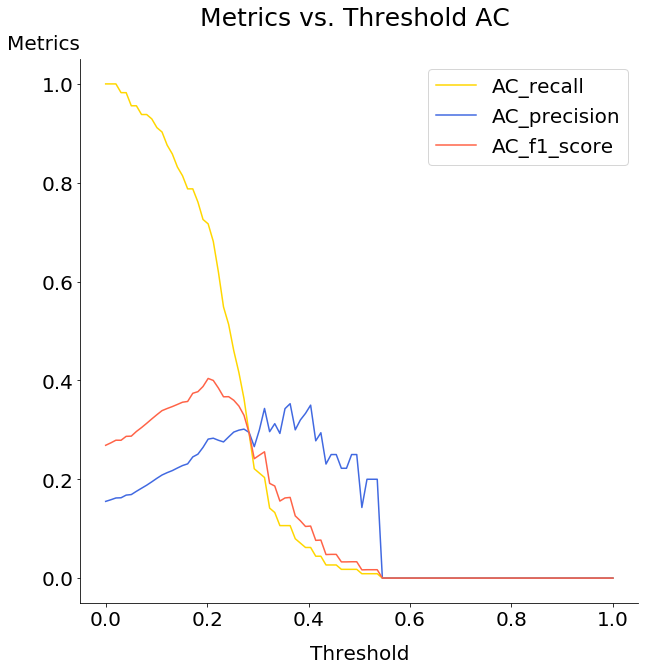

In [80]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ac_n
y2=precision_score_ac_n
y3=f1_score_ac

ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='AC_recall',color='gold')
plt.plot(x,y2,label='AC_precision',color='royalblue')
plt.plot(x,y3,label='AC_f1_score',color='tomato')
#plt.axvline(0.215, color='gold', linestyle='solid')
plt.title("Metrics vs. Threshold AC \n", size = 25)

plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});



In [81]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.15151515151515152
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[303, 312],
       [ 21,  92]])

In [82]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.94      0.49      0.65       615
        1.0       0.23      0.81      0.36       113

avg / total       0.83      0.54      0.60       728



In [83]:
ind=np.argmax(precision_score_ac_n)
list(np.linspace(0,1,100))[ind]

0.36363636363636365

In [84]:
precision_score_ac_n[ind]

0.35294117647058826

In [85]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.36363636363636365
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[593,  22],
       [101,  12]])

In [86]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.85      0.96      0.91       615
        1.0       0.35      0.11      0.16       113

avg / total       0.78      0.83      0.79       728



In [87]:
recall_score_ipo_n=[]
precision_score_ipo_n=[]
f1_score_ipo=[]

for i in np.linspace(0,1,100):
    y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ipo_n.append(metrics.precision_score(y1_ipo_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ipo_n.append(metrics.recall_score(y1_ipo_test, y_score))
    f1_score_ipo.append(metrics.f1_score(y1_ipo_test, y_score))


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: P

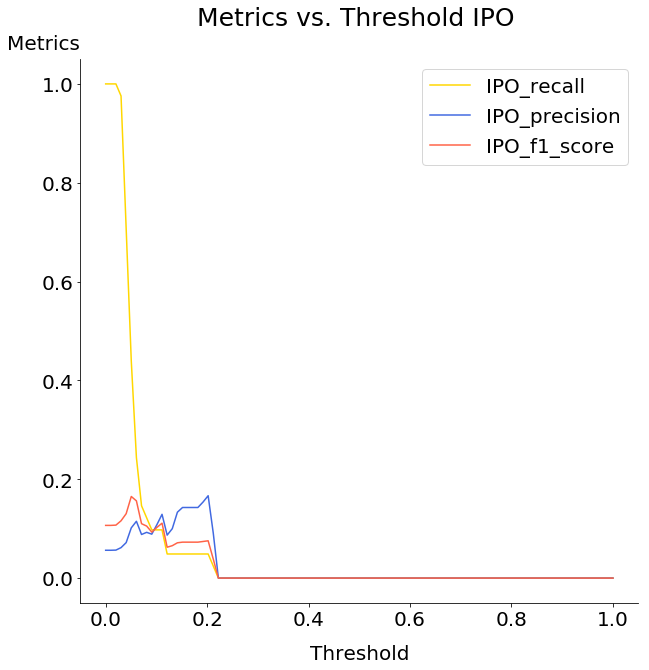

In [88]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ipo_n
y2=precision_score_ipo_n
y3=f1_score_ipo
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='IPO_recall',color='gold')
plt.plot(x,y2,label='IPO_precision',color='royalblue')
plt.plot(x,y3,label='IPO_f1_score',color='tomato')
plt.title("Metrics vs. Threshold IPO \n", size = 25)
plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});

In [89]:
ind=np.argmax(f1_score_ipo)
list(np.linspace(0,1,100))[ind]

0.05050505050505051

In [90]:
ind

5

In [91]:
f1_score_ipo[ind]

0.1651376146788991

In [92]:
y_ipo_predlogn=log_ipo_n.predict_proba(X1_test_n)[:,1] >0.09090909090909091
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[646,  41],
       [ 37,   4]])

In [93]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.95      0.94      0.94       687
        1.0       0.09      0.10      0.09        41

avg / total       0.90      0.89      0.90       728



In [94]:
ind=np.argmax(precision_score_ipo_n)
list(np.linspace(0,1,100))[ind]

0.20202020202020204

In [95]:
precision_score_ipo_n[ind]

0.16666666666666666

In [96]:
y_ipo_predlogn=log_ipo_n.predict_proba(X1_test_n)[:,1] >0.09090909090909091
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[646,  41],
       [ 37,   4]])

In [97]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.95      0.94      0.94       687
        1.0       0.09      0.10      0.09        41

avg / total       0.90      0.89      0.90       728



In [98]:
log_ac_n.best_estimator_.coef_

array([[-0.24565567, -0.18983522, -0.15322313, -0.192307  , -0.1424098 ,
        -0.07343324, -0.16769855, -0.09438134,  0.00212017, -0.14482819,
        -0.03050763, -0.03143311, -0.0492704 , -0.12424593, -0.0765598 ,
        -0.1960492 , -0.100687  , -0.07767955, -0.14200227, -0.33269972,
        -0.05755277,  0.0230559 ,  0.02101262, -0.24418349,  0.        ,
        -0.02002491, -0.13645924, -0.13062689, -0.04064601,  0.01222194,
        -0.00652379, -0.075951  ,  0.        ,  0.04921197, -0.00705836,
        -0.03504797, -0.07425413,  0.02179239, -0.02199277, -0.09915568,
         0.        ,  0.21584378,  0.04376061,  0.17855144,  0.03819489,
         0.05907286, -0.04519181, -1.2096293 , -0.85219014, -0.15460617,
        -0.0873837 ,  0.        ,  0.        ]])

In [99]:
len(X1.columns)

53

In [100]:
names = X1.columns
coefs_ac = log_ac_n.best_estimator_.coef_[0]
coef_ac=pd.DataFrame({'names':names,'coefs_ac':coefs_ac })

In [101]:
coef_ac['abscoef']=abs(coef_ac['coefs_ac'])

coef_ac=coef_ac.sort_values(by='abscoef',ascending=False)
coef_ac

,names,coefs_ac,abscoef
47,first_funding_dayinop,-1.209629,1.209629
48,ave_inf_y,-0.852190,0.852190
19,category_code[T.medical],-0.332700,0.332700
0,category_code[T.analytics],-0.245656,0.245656
23,category_code[T.nanotech],-0.244183,0.244183
41,CA,0.215844,0.215844
15,category_code[T.hospitality],-0.196049,0.196049
3,category_code[T.cleantech],-0.192307,0.192307
1,category_code[T.automotive],-0.189835,0.189835
43,MA,0.178551,0.178551


In [102]:
coef2_ac=coef_ac.iloc[:18]
coef2_ac

,names,coefs_ac,abscoef
47,first_funding_dayinop,-1.209629,1.209629
48,ave_inf_y,-0.852190,0.852190
19,category_code[T.medical],-0.332700,0.332700
0,category_code[T.analytics],-0.245656,0.245656
23,category_code[T.nanotech],-0.244183,0.244183
41,CA,0.215844,0.215844
15,category_code[T.hospitality],-0.196049,0.196049
3,category_code[T.cleantech],-0.192307,0.192307
1,category_code[T.automotive],-0.189835,0.189835
43,MA,0.178551,0.178551


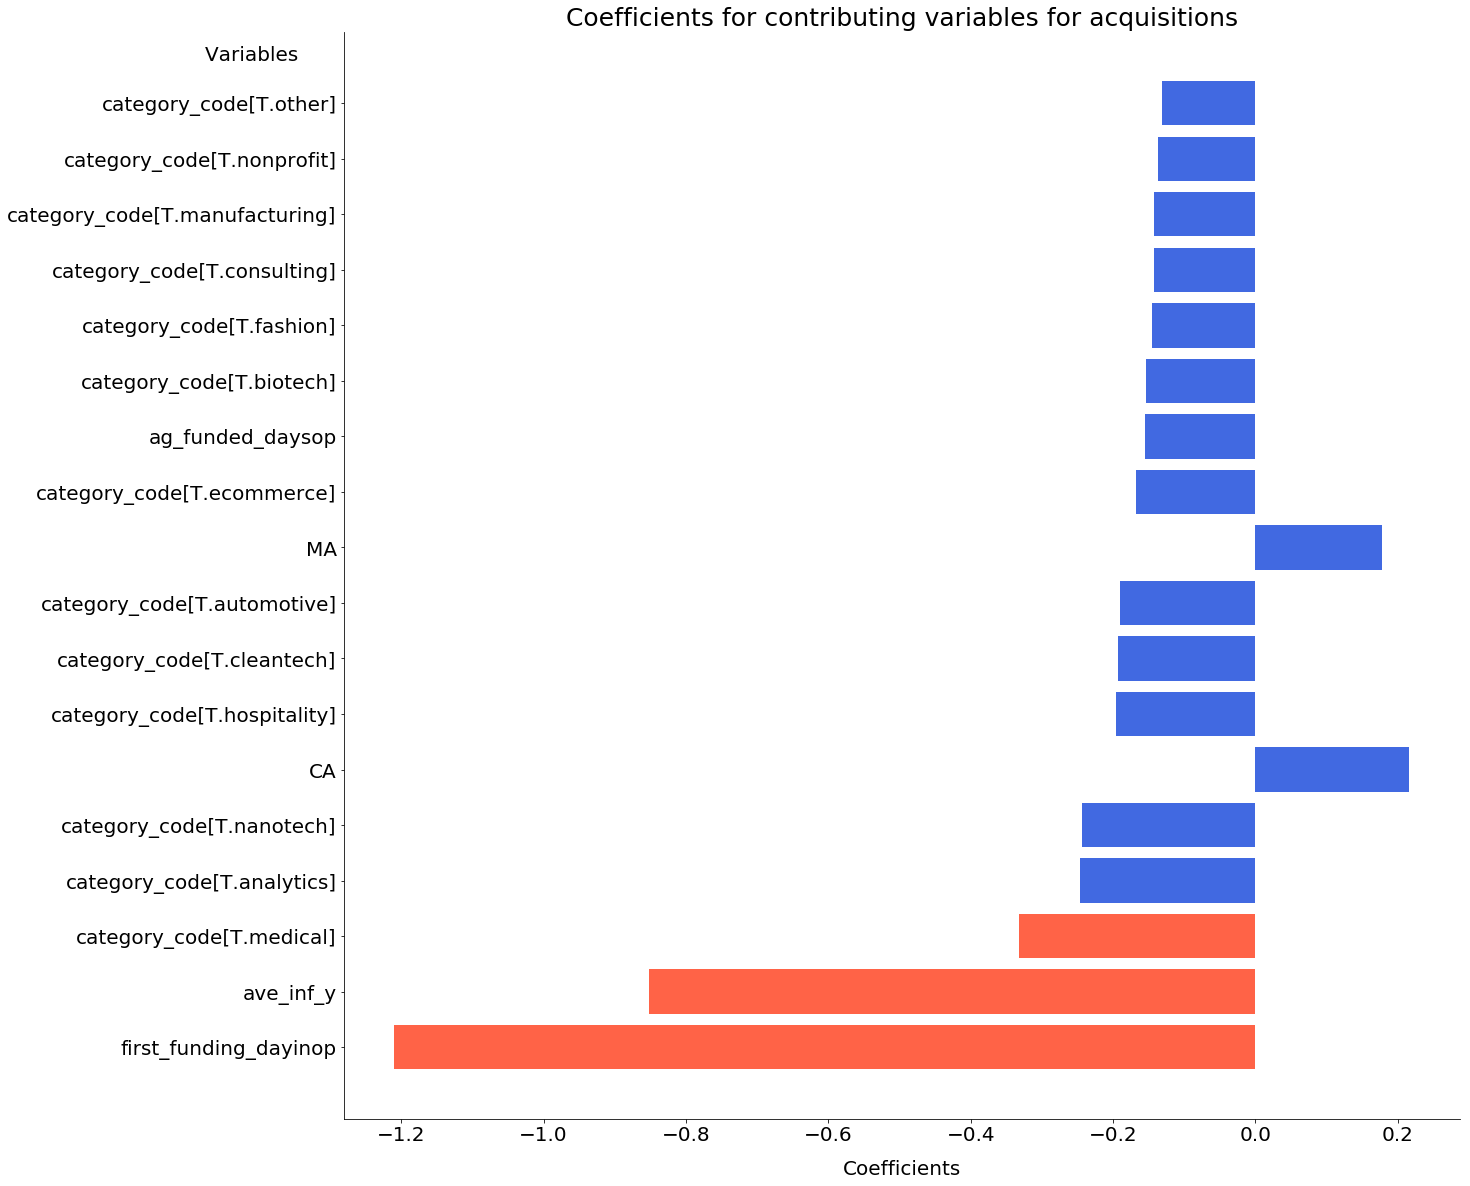

In [103]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2_ac))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2_ac['coefs_ac'],color='royalblue')
plt.barh(crange[:3], coef2_ac['coefs_ac'][:3],color='tomato')
plt.yticks(crange, coef2_ac['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for acquisitions", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [104]:
names = X1.columns
coefs_ipo = log_ipo_n.best_estimator_.coef_[0]
coef_ipo=pd.DataFrame({'names':names,'coefs_ipo':coefs_ipo })

In [105]:
coef_ipo['abscoef']=abs(coef_ipo['coefs_ipo'])

coef_ipo=coef_ipo.sort_values(by='abscoef',ascending=False)
coef_ipo

,names,coefs_ipo,abscoef
48,ave_inf_y,-0.419200,0.419200
36,category_code[T.software],-0.133642,0.133642
7,category_code[T.education],-0.120745,0.120745
10,category_code[T.finance],0.087056,0.087056
30,category_code[T.public_relations],-0.053406,0.053406
2,category_code[T.biotech],0.050508,0.050508
46,founded_month,0.049601,0.049601
3,category_code[T.cleantech],0.034668,0.034668
1,category_code[T.automotive],-0.032202,0.032202
35,category_code[T.social],0.027508,0.027508


In [106]:
coef2_ipo=coef_ipo.iloc[:18]
coef2_ipo

,names,coefs_ipo,abscoef
48,ave_inf_y,-0.419200,0.419200
36,category_code[T.software],-0.133642,0.133642
7,category_code[T.education],-0.120745,0.120745
10,category_code[T.finance],0.087056,0.087056
30,category_code[T.public_relations],-0.053406,0.053406
2,category_code[T.biotech],0.050508,0.050508
46,founded_month,0.049601,0.049601
3,category_code[T.cleantech],0.034668,0.034668
1,category_code[T.automotive],-0.032202,0.032202
35,category_code[T.social],0.027508,0.027508


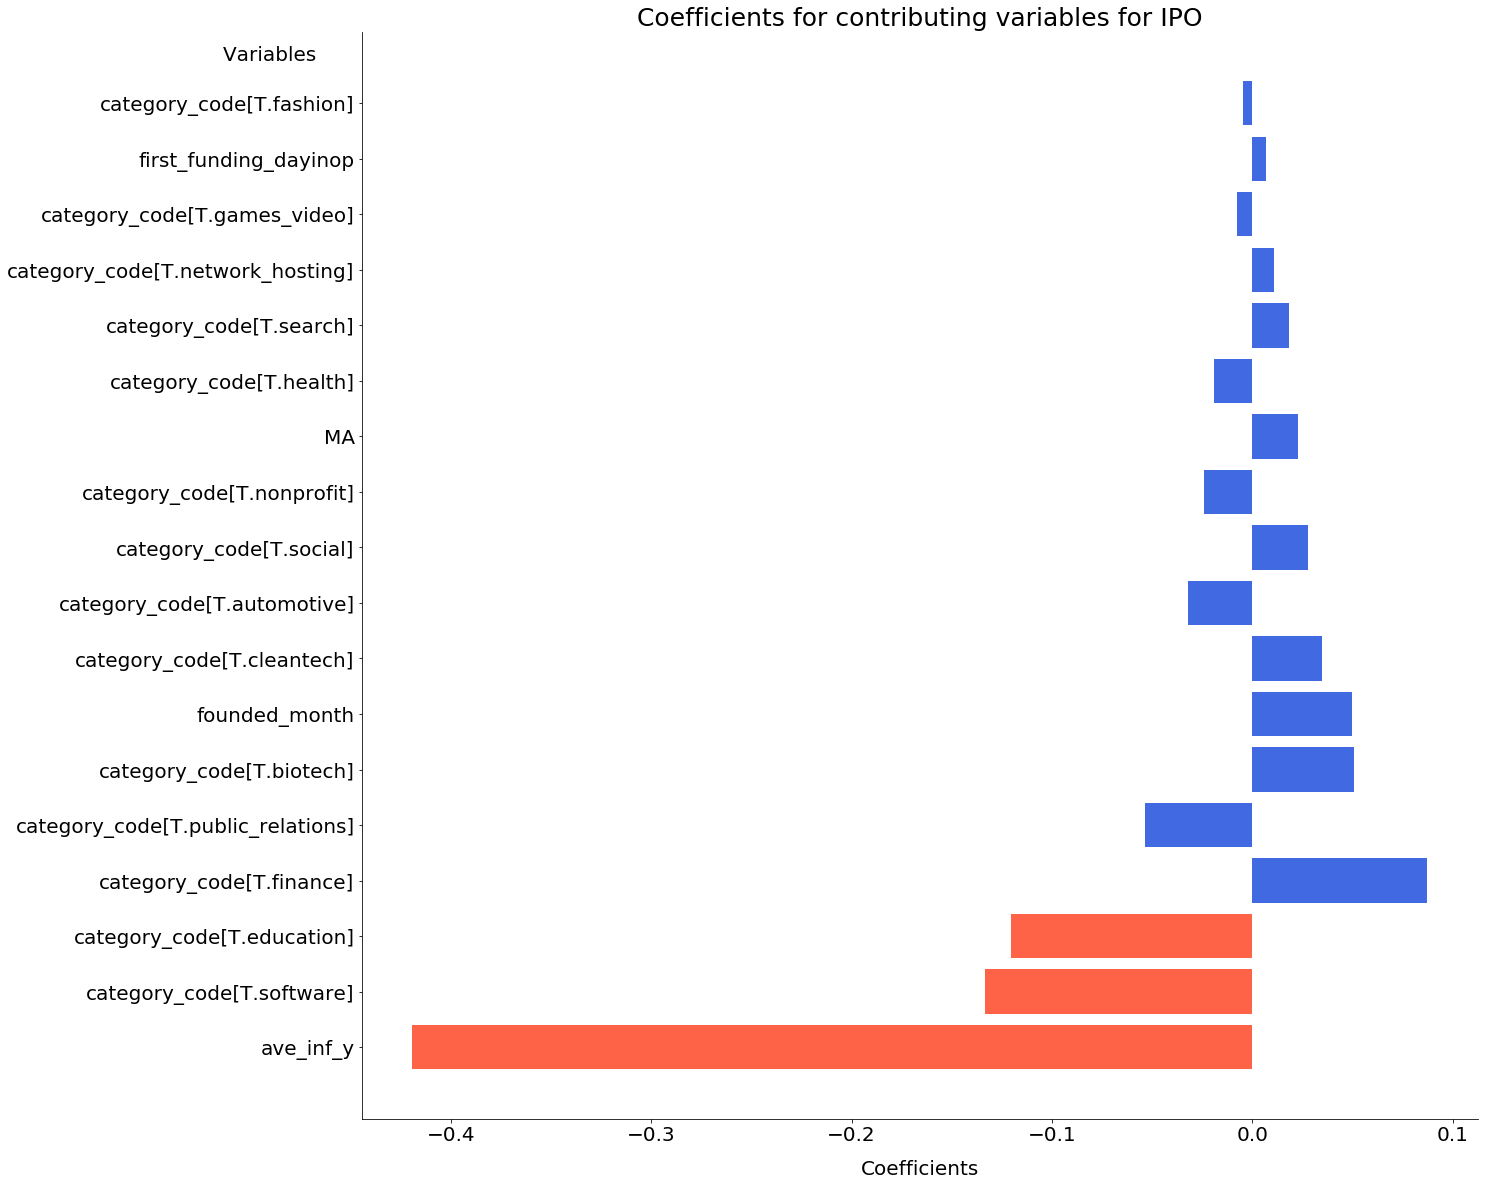

In [107]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2_ipo))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2_ipo['coefs_ipo'],color='royalblue')
plt.barh(crange[:3], coef2_ipo['coefs_ipo'][:3],color='tomato')
plt.yticks(crange, coef2_ipo['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for IPO", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [108]:
pkl.dump(Model_data_ac, open("Model_data_ac_wo_sa_mod.pickle", "wb"))

In [109]:
pkl.dump(Model_data_ipo, open("Model_data_ipo_wo_sa_mod.pickle", "wb"))

In [110]:
Model_data_ac.to_csv('Model_data_ac_wo_sa_mod.csv')

In [111]:
Model_data_ipo.to_csv('Model_data_ipo_wo_sa_mod.csv')

In [112]:
log_ac_n.best_params_


{'C': 1, 'penalty': 'l1'}

In [113]:
coef=pd.merge(coef_ipo,coef_ac,how='left', on='names')

In [114]:
coef=coef.sort_values(by='abscoef_y',ascending=False)

In [115]:
coef

,names,coefs_ipo,abscoef_x,coefs_ac,abscoef_y
16,first_funding_dayinop,0.006844,0.006844,-1.209629,1.209629
0,ave_inf_y,-0.419200,0.419200,-0.852190,0.852190
44,category_code[T.medical],0.000000,0.000000,-0.332700,0.332700
31,category_code[T.analytics],0.000000,0.000000,-0.245656,0.245656
48,category_code[T.nanotech],0.000000,0.000000,-0.244183,0.244183
27,CA,0.000000,0.000000,0.215844,0.215844
40,category_code[T.hospitality],0.000000,0.000000,-0.196049,0.196049
7,category_code[T.cleantech],0.034668,0.034668,-0.192307,0.192307
8,category_code[T.automotive],-0.032202,0.032202,-0.189835,0.189835
11,MA,0.022846,0.022846,0.178551,0.178551


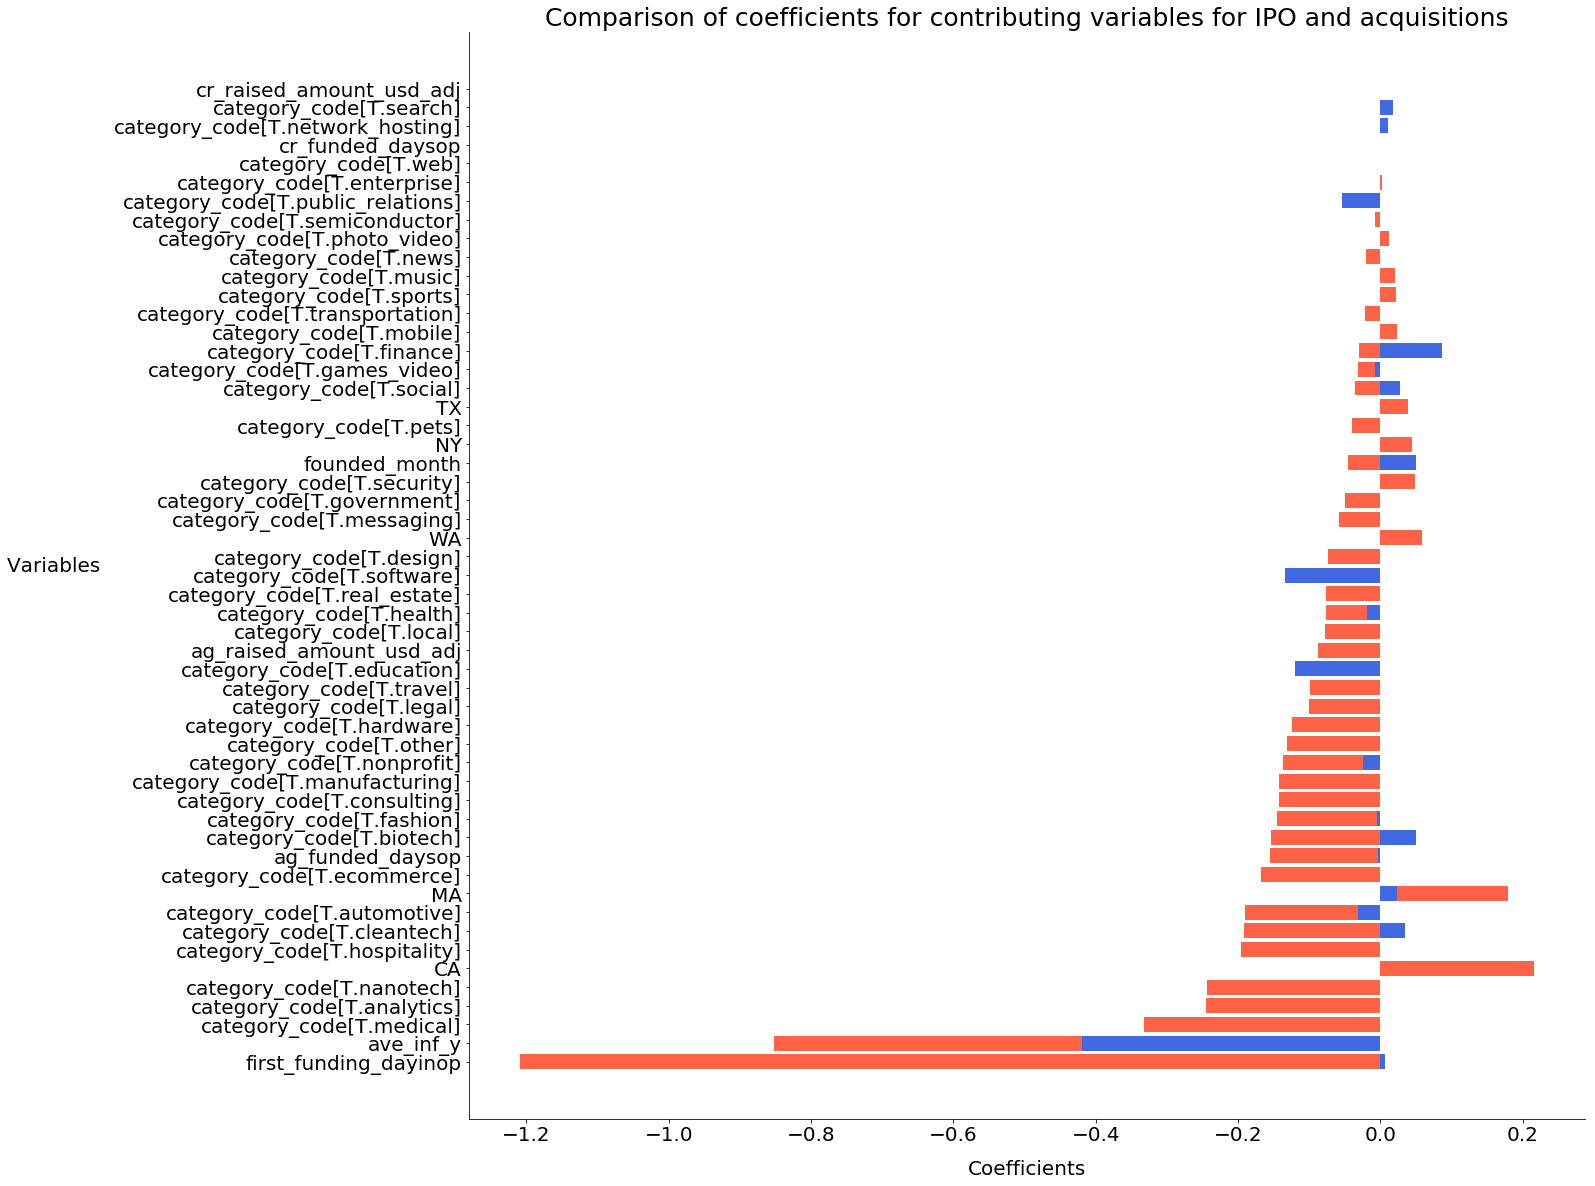

In [116]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef['coefs_ac'],color='tomato')
plt.barh(crange, coef['coefs_ipo'],color='royalblue')
plt.yticks(crange, coef['names'])

# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Comparison of coefficients for contributing variables for IPO and acquisitions", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()